<a href="https://colab.research.google.com/github/yjoechuen/disaster-tweets/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/disaster-tweets/

/content/drive/MyDrive/disaster-tweets


## Import Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv("./data/sample_submission.csv")

## Inspect

In [5]:
print('In our training set, we have {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
print('In our test set, we have {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

In our training set, we have 7613 rows and 5 columns.
In our test set, we have 3263 rows and 4 columns.


In [6]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


## Data Analysis

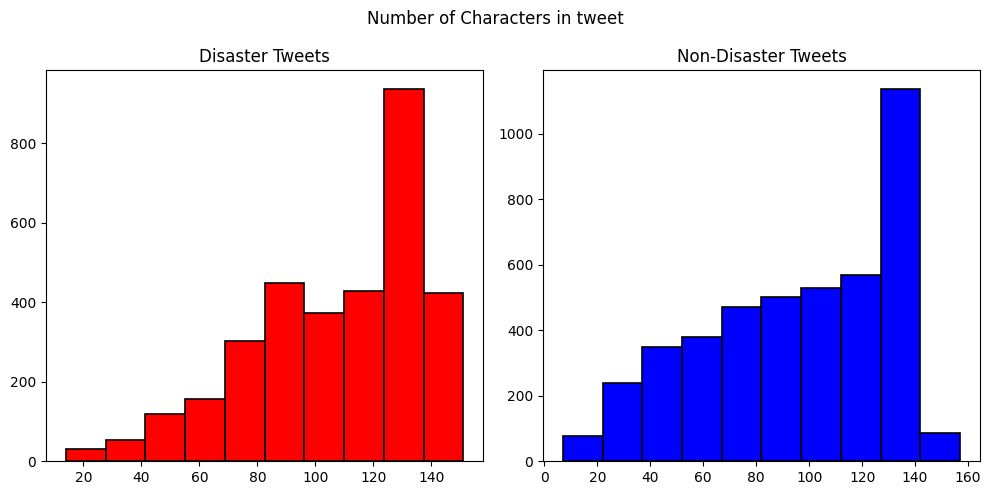

In [14]:
# Number of characters in tweet

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.len()
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.len()
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Number of Characters in tweet")
plt.tight_layout()
plt.show()

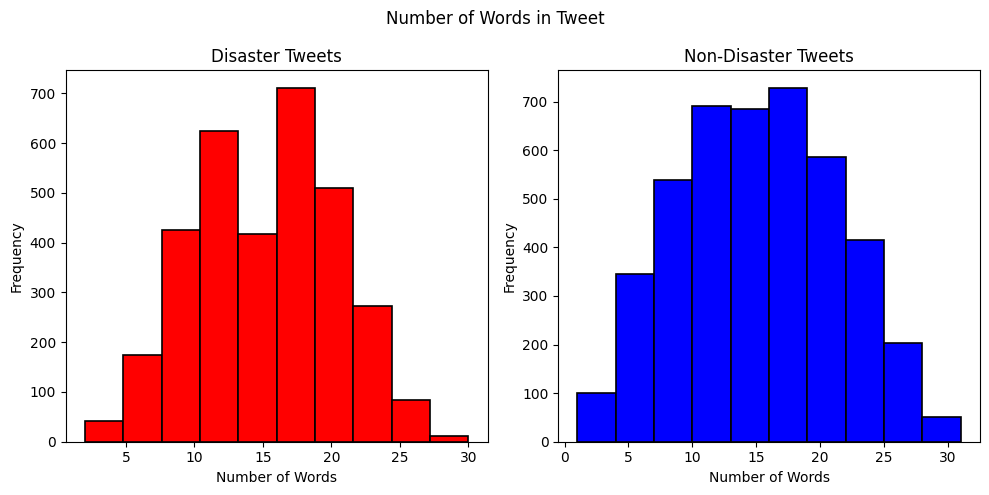

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Function to count words in a string
def word_count(text):
    return len(text.split())

# Disaster Tweets
word_len_dis = train[train['target'] == 1]['text'].apply(word_count)
ax1.hist(word_len_dis, color='red', edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')

# Non-Disaster Tweets
word_len_ndis = train[train['target'] == 0]['text'].apply(word_count)
ax2.hist(word_len_ndis, color='blue', edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')

plt.suptitle("Number of Words in Tweet")
plt.tight_layout()
plt.show()